Design for this project:
1. Merge all dataset in one whole dataset(at the beginning, can be merge two dataset first, and do implementation for the data pipeline.
2. Use data mining techniques prepare the data pipeline.
 Do data vitrulization and use distance, density to see two location's distance, relationships.

 scale the dataset using factors, how to format the dataset properly.

3. Use LLM to do pre-train and fine-tunning to to the outlier detection. no labal data and compare with the troditional teniques with labal data
Use F1,
4. Compare the model's learning performance and compare the results with original label data. MSE and T5 .



In [1]:
# Connect the colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Find the dataset in Google Drive
file_path = '/content/drive/My Drive/trajectory_MiPo-main/dataset/StSt5R/inners.txt'



In [3]:
# Read the file -- inners.txt
with open(file_path, 'r') as file:
    file_contents1 = file.read()

print(file_contents1)




[[97891.96064244593, -13304.748564803516], [97941.9632222884, -13155.94499795919], [97981.69695686174, -12972.248352363582], [98002.26885707927, -12820.837817293379], [98007.34127291794, -12805.756242381121], [98014.70104416861, -12792.645626330488], [98072.9460318617, -12696.776905738356], [98026.91536078455, -12580.293603856679], [98043.19229114724, -12389.906269520581], [98089.29499122516, -12176.096544456976], [98136.51044666728, -11933.245806030205], [98229.82376156515, -11644.732666123722], [98314.89998975613, -11193.185192206709], [98314.71080711535, -11179.175354436386], [98315.94717140825, -11159.140940292698], [98305.18456610144, -10920.074792618854], [98364.04316224417, -10648.039237166244], [98582.5935018735, -10485.939866826227], [98917.96340605042, -10494.39862293279], [99291.05365395237, -10451.281878223826], [99583.69254642328, -10695.501932633417], [99898.88095111442, -10934.396536603575], [100197.05421061142, -11030.384928746615], [100333.29798726368, -11239.695142828

In [4]:
from IPython.utils.text import textwrap
import pandas as pd

# Replace this with the actual path to your dataset
path = "/content/drive/My Drive/trajectory_MiPo-main/dataset/StSt5R/inners.txt"

# Read the dataset using pandas
with open(path, 'r') as file:
    lines = file.readlines()

formatted_data = []

# Add a header line
header = "Index""    X Y pair"
formatted_data.append(header)

for i, line in enumerate(lines):
    # Split by ',' and remove any unwanted characters
    elements = line.strip().replace('[', '').replace(']', '').split(',')
    # Add a comma at the end of each line
    formatted_line = f"index {i}:   [{', '.join(elements)}],"
    formatted_data.append(formatted_line)

# Join the formatted lines with newlines to create the final formatted dataset
formatted_dataset = '\n'.join(formatted_data)
print(formatted_dataset)




Index    X Y pair
index 0:   [97891.96064244593,  -13304.748564803516,  97941.9632222884,  -13155.94499795919,  97981.69695686174,  -12972.248352363582,  98002.26885707927,  -12820.837817293379,  98007.34127291794,  -12805.756242381121,  98014.70104416861,  -12792.645626330488,  98072.9460318617,  -12696.776905738356,  98026.91536078455,  -12580.293603856679,  98043.19229114724,  -12389.906269520581,  98089.29499122516,  -12176.096544456976,  98136.51044666728,  -11933.245806030205,  98229.82376156515,  -11644.732666123722,  98314.89998975613,  -11193.185192206709,  98314.71080711535,  -11179.175354436386,  98315.94717140825,  -11159.140940292698,  98305.18456610144,  -10920.074792618854,  98364.04316224417,  -10648.039237166244,  98582.5935018735,  -10485.939866826227,  98917.96340605042,  -10494.39862293279,  99291.05365395237,  -10451.281878223826,  99583.69254642328,  -10695.501932633417,  99898.88095111442,  -10934.396536603575,  100197.05421061142,  -11030.384928746615,  100333.2

In [5]:
!pip install PyDrive


In [6]:
!pip install matplotlib


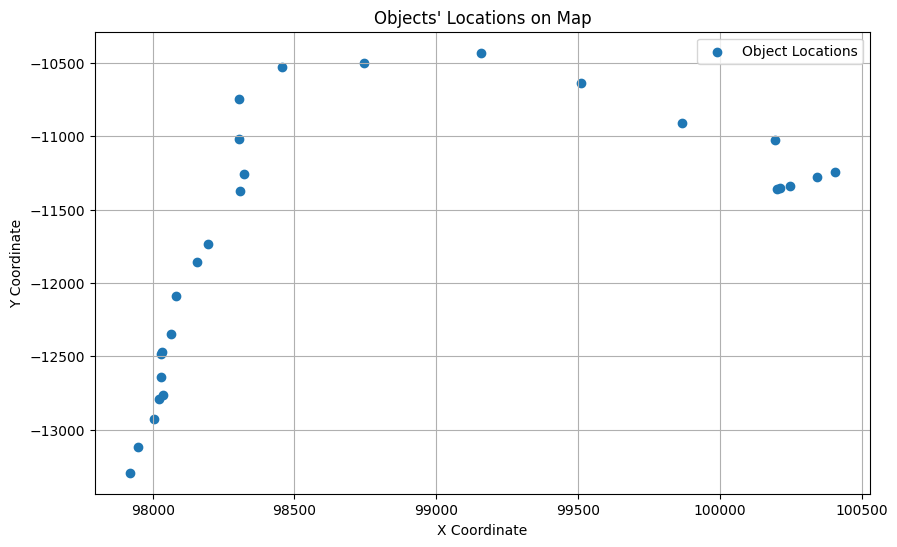

In [7]:
import matplotlib.pyplot as plt

# index 0 : x and y format as pairs, and use x and y coordinates, multiple pairs.
#

# Your X and Y data
data1 = [
    (97920.46045102825, -13294.356347513412),
    (97949.72714548952, -13116.806027721083),
    (98003.7230081856, -12928.91375048445),
    (98021.42851238509, -12788.551478975363),
    (98036.16140944195, -12763.330913348773),
    (98030.76428032378, -12642.296594603295),
    (98029.43001935349, -12487.177472797217),
    (98031.48832537353, -12472.136477717871),
    (98064.50307340373, -12349.583732179304),
    (98082.09507129231, -12089.116631842653),
    (98155.82690657309, -11856.91800757987),
    (98195.57625012657, -11731.27105960403),
    (98307.56597700273, -11375.445419483016),
    (98321.05159547701, -11258.159605024859),
    (98302.76933022366, -11020.195958015205),
    (98304.36690762555, -10747.933570529221),
    (98456.59002092897, -10527.681843847256),
    (98744.7579609894, -10499.754537453566),
    (99158.92317457836, -10430.063818907043),
    (99512.02383602578, -10633.426701594064),
    (99866.13258999615, -10908.82303874867),
    (100195.4787513368, -11025.402175170326),
    (100342.08100827642, -11275.606078757344),
    (100404.9600979815, -11245.712737932285),
    (100245.7976460422, -11341.991269408098),
    (100210.55632580693, -11354.487446384495),
    (100202.35229254737, -11360.60578444404)
]

# Extract X and Y coordinates from the data
x_coords, y_coords = zip(*data1)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_coords, y_coords, label='Object Locations', marker='o')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Objects\' Locations on Map')
plt.legend()
plt.grid(True)

plt.show()




In [8]:
# check the outliers file and see how about the format of outliers.
file_path = '/content/drive/My Drive/trajectory_MiPo-main/dataset/StSt5R/outliers.txt'

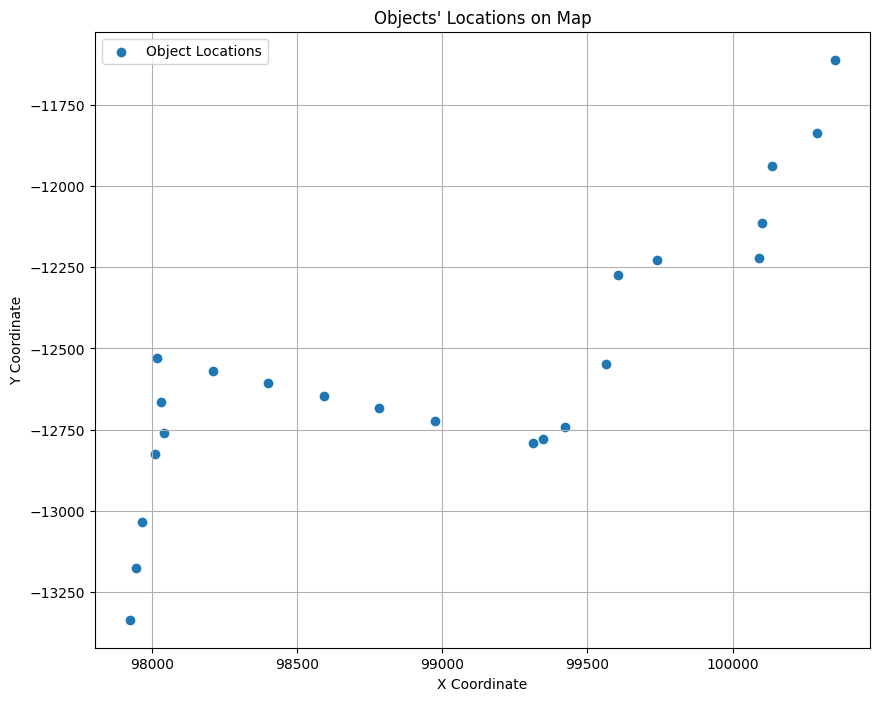

In [11]:
import matplotlib.pyplot as plt
import re

data2 = [[97925.54664469318, -13336.325052157175], [97944.5063420548, -13176.929343171345], [97966.6944382334, -13033.50425980033], [98012.13148843867, -12825.709419105746], [98043.66925728705, -12761.228001035108], [98033.34794184087, -12666.283018104516], [98017.95392322894, -12530.370089508871], [98209.15667219383, -12568.777493815607], [98400.35942115872, -12607.184898122343], [98591.56217012361, -12645.592302429079], [98782.7649190885, -12683.999706735814], [98973.96766805339, -12722.40711104255], [99310.89300080495, -12790.086198012927], [99345.43031284033, -12780.606819384873], [99422.51974232786, -12741.520310067686], [99563.79356504035, -12546.417398158708], [99606.04538218748, -12274.598359685004], [99738.04572933787, -12228.75119634674], [100091.37374968475, -12221.897960116856], [100101.94294780247, -12113.656445743967], [100135.68486528168, -11937.035518624396], [100290.2590579196, -11834.817583610862], [100351.20736639432, -11609.77772137307]]
[[97964.91903138004, -13349.807592073019], [97962.57766966827, -13343.833800363958], [98031.52556559205, -13258.831174569295], [98134.4746517951, -13180.375679211567], [98197.3888869912, -13039.403212498888], [98344.647069517, -13061.436076794942], [98558.19286475886, -13136.616448832376], [98683.75124151216, -13169.946084069634], [98685.98468997881, -13167.914027858249], [98688.99877282478, -13167.873158167498], [98649.3270215294, -12936.169943079974], [98609.65527023403, -12704.46672799245], [98569.98351893865, -12472.763512904927], [98530.31176764327, -12241.060297817403], [98490.6400163479, -12009.357082729879], [98450.96826505252, -11777.653867642355], [98411.29651375714, -11545.950652554831], [98371.62476246177, -11314.247437467307], [98307.7282022658, -10941.059011269237], [98369.24837009894, -10642.96442388695], [98610.50416839981, -10488.564217284053], [98997.53508690806, -10473.298396374483], [99382.3714270282, -10518.095232368949], [99709.297029498, -10789.866751221447], [100066.29323254162, -11000.15621577934], [100353.63765962276, -11239.414611038708], [100378.8111352454, -11644.428126196848]]
[[98015.7822215072, -13265.048514400682], [98120.69690813491, -13220.596827115916], [98147.51220058955, -13141.165368889899], [98210.76312721787, -13025.210357978029], [98338.68654094337, -13066.521043932598], [98552.86408645015, -13132.685065234124], [98531.96042991472, -12956.01682577055], [98511.05677337929, -12779.348586306976], [98490.15311684385, -12602.680346843403], [98469.24946030842, -12426.01210737983], [98448.34580377299, -12249.343867916255], [98427.44214723755, -12072.675628452682], [98406.53849070212, -11896.007388989108], [98385.63483416669, -11719.339149525535], [98364.73117763126, -11542.670910061961], [98343.82752109582, -11366.002670598387], [98308.70453968985, -11069.159136109758], [98309.6803414451, -10750.864422097395], [98452.19234339576, -10536.749335947465], [98718.40796869986, -10501.113066192744], [99131.12152810287, -10435.447187171632], [99470.70520140765, -10586.950054204914], [99814.96262523781, -10858.47994421456], [100117.54490987238, -11001.452854018637], [100304.2946125132, -11158.022034764517], [100367.15302410067, -11345.322598767327], [100406.94162625124, -11334.764684351785], [100249.30698900977, -11377.974972735014]]
[[97968.67327101012, -13348.756175447304], [97973.7327069636, -13332.673923177688], [98002.01711039981, -13306.270136038102], [98055.61158833021, -13256.504946024377], [98113.32338589447, -13232.706846092171], [98140.78595345923, -13201.309157438172], [98177.78600721479, -13094.716346568666], [98239.47733042552, -13030.828128926418], [98311.08745846256, -13031.862925849638], [98441.2044933466, -13068.137763791303], [98667.62909888185, -13148.145171830052], [98707.06970949452, -13166.627211449633], [98978.93868737703, -13040.826758420535], [98971.00137705046, -12955.859308228568], [99028.6774528146, -12818.954086395626], [99112.79980919088, -12576.595057828992], [99232.97203941456, -12325.736328846559], [99350.22453189327, -12195.086530508559], [99467.47702437198, -12064.43673217056], [99584.7295168507, -11933.78693383256], [99701.98200932941, -11803.13713549456], [99819.23450180813, -11672.48733715656], [99936.48699428684, -11541.837538818561], [100053.73948676555, -11411.187740480562], [100170.99197924427, -11280.537942142562], [100294.29476872025, -11143.146538011164], [100366.95990101667, -11331.312791405757], [100370.11415833623, -11232.181083903035], [100247.20786332444, -11334.965604893947], [100099.6270776183, -11397.051007845786]]
[[97928.68205910042, -13289.241309640596], [97957.06044084209, -13101.694065994747], [98003.57490106096, -12917.90601653665], [98017.6341716846, -12786.600815331172], [98020.75583342074, -12794.565846010886], [98046.30509262183, -12677.118190173347], [98028.19250097682, -12507.211832956187], [98035.61837868119, -12443.055188717179], [98097.2200818929, -12205.015365556013], [98149.34510253677, -11935.074461405411], [98280.06034997337, -11458.890499543293], [98321.11571484694, -11207.113587024616], [98316.98426532948, -11180.14551667454], [98310.40032614912, -11083.148614773912], [98305.20471868107, -10809.977137537937], [98398.94589722987, -10610.534438305009], [98468.9187259109, -10762.383190306924], [98538.89155459193, -10914.23194230884], [98608.86438327296, -11066.080694310755], [98678.83721195399, -11217.92944631267], [98748.81004063501, -11369.778198314585], [98818.78286931604, -11521.6269503165], [98888.75569799707, -11673.475702318416], [98958.7285266781, -11825.324454320331], [99028.70135535912, -11977.173206322246], [99098.67418404015, -12129.021958324161], [99168.64701272118, -12280.870710326077], [99238.61984140221, -12432.719462327992], [99377.96904509894, -12735.12259612525], [99520.91352138598, -12607.057250249369], [99623.09936373065, -12364.44489010047], [99655.22390657384, -12233.889474158708], [99966.33301593855, -12225.618604273932], [100129.46477849719, -12142.30359606075], [100109.40186950601, -11998.45147075083], [100261.22158169786, -11860.240024075789], [100321.91892077902, -11726.284940108626], [100369.44288747317, -11511.438886389578]]
[[97951.5168054547, -13305.949064529677], [98076.48138042506, -13239.208709516763], [98146.34224126552, -13166.203265432401], [98235.03950742766, -13092.942901524622], [98326.88703175372, -13085.697288200425], [98334.66231305554, -13047.558597675397], [98497.66364315529, -13063.37033522886], [98526.08492662075, -13103.021063789998], [98593.33729313052, -13116.122722573698], [98688.06900496878, -13154.874244811692], [98777.95091997602, -13042.388192793333], [98867.83283498326, -12929.902140774973], [98957.7147499905, -12817.416088756614], [99105.27428676179, -12632.747240437968], [99192.02002787535, -12417.375439019017], [99255.40106289825, -12257.370065839305], [99329.93019039457, -12086.202146208134], [99430.64859547562, -11846.615160536017], [99529.3735768957, -11627.071688525157], [99650.78839433761, -11414.222240241445], [99761.56882092234, -11305.608931734469], [99971.4772481907, -11392.80767736651], [100070.88266308342, -11498.536319868315], [100170.65263786839, -11685.330754312812], [100333.50405270065, -11692.094910024518], [100367.54148058333, -11537.488277644266]]
[[97906.2374559826, -13301.553876568281], [97937.71119284163, -13176.01990129115], [97980.9030733927, -12969.25638745686], [98109.81766439656, -12916.474546980693], [98189.04444241174, -12979.46270249867], [98333.67914791063, -13030.556831946062], [98523.42278012395, -13129.080132428597], [98549.86355674163, -13133.726581154324], [98570.92547272585, -12932.20704878181], [98591.98738871007, -12730.687516409294], [98613.04930469429, -12529.16798403678], [98634.1112206785, -12327.648451664265], [98655.17313666272, -12126.12891929175], [98676.23505264694, -11924.609386919235], [98697.29696863116, -11723.08985454672], [98718.35888461537, -11521.570322174206], [98739.42080059959, -11320.050789801691], [98760.4827165838, -11118.531257429177], [98781.54463256802, -10917.011725056662], [98802.60654855224, -10715.492192684147], [98824.0116673328, -10510.68891029265], [99216.169216331, -10429.283232591617], [99528.7323399223, -10643.207001032359], [99831.82299836642, -10879.26726533439], [100112.32687665983, -11005.528222994817], [100294.29476872025, -11143.146538011164], [100366.95990101667, -11331.312791405757], [100370.11415833623, -11232.181083903035], [100247.20786332444, -11334.965604893947], [100099.6270776183, -11397.051007845786]]
[[97967.91973158783, -13348.766318299837], [97985.46626047447, -13308.49474352633], [98049.32742959472, -13237.572801169406], [98138.1478885869, -13173.319956756788], [98275.38852201604, -13157.831777632176], [98412.62915544519, -13142.343598507565], [98549.86978887433, -13126.855419382953], [98687.11042230348, -13111.367240258342], [98934.29907802738, -13083.470967254034], [98985.9106379285, -13054.74435500844], [99127.74271806345, -12954.726966186361], [99296.79512683782, -12806.292773206731], [99349.80104991554, -12769.537385009717], [99484.42954865734, -12694.63338739782], [99574.57551507694, -12508.236107622564], [99602.20911183265, -12324.695305639993], [99647.62120311233, -12228.989145521315], [99906.75766518223, -12222.433238774382], [100136.94726532692, -12193.246027739206], [100100.48801693118, -12062.631067445498], [100160.31285731202, -11919.68141511253], [100287.30065386399, -11838.861922257753], [100338.35015763271, -11661.000469195387], [100333.02884045902, -11438.876110449242]]
[[97933.12253857125, -13283.176256475332], [97935.16787762567, -13267.134587649647], [97945.9864743575, -13174.907655717734], [97944.02195074336, -13140.904029532676], [97943.9815847067, -13137.90192006403], [97976.82626407822, -13002.340455228998], [98026.83756171718, -12798.487466788272], [98184.99727123576, -12886.716636164005], [98343.15698075433, -12974.945805539737], [98501.3166902729, -13063.17497491547], [98688.99877282478, -13167.873158167498], [98690.54648755258, -13170.854829975813], [98815.82790410593, -13128.118588016012], [99006.26079716878, -12999.418757585148], [99028.00560016562, -12824.968551352988], [99127.14277983537, -12578.401472984988], [99267.19672286276, -12238.192294499535], [99420.52475925357, -11877.781033558836], [99574.86402053373, -11537.370172743036], [99732.147904638, -11303.009629941023], [99767.74627984442, -11316.534003875366], [99986.6814093281, -11402.607642036839], [100068.3536618973, -11588.651204145488]]


# Extract x and y coordinates from the data
x_coords = []
y_coords = []

for item in data2:
    for i in range(0, len(item), 2):
        x_coords.append(item[i])
        y_coords.append(item[i+1])

plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, label='Object Locations', marker='o')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Objects\' Locations on Map')
plt.legend()
plt.grid(True)

plt.show()



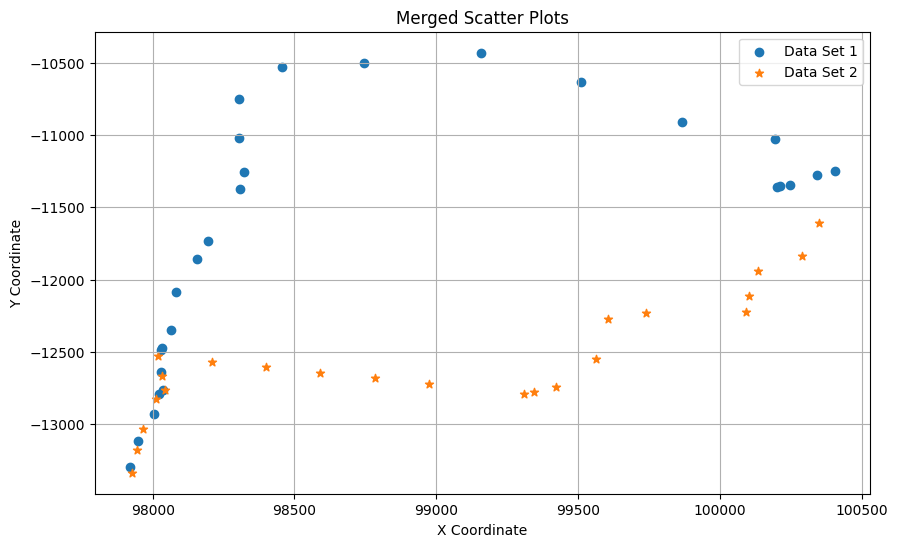

In [13]:
# merge index 0's data from outliners txt with innners in one plot, and see what's going on.
import matplotlib.pyplot as plt
data1 =  [
    [97920.46045102825, -13294.356347513412],
    [97949.72714548952, -13116.806027721083],
    [98003.7230081856, -12928.91375048445],
    [98021.42851238509, -12788.551478975363],
    [98036.16140944195, -12763.330913348773],
    [98030.76428032378, -12642.296594603295],
    [98029.43001935349, -12487.177472797217],
    [98031.48832537353, -12472.136477717871],
    [98064.50307340373, -12349.583732179304],
    [98082.09507129231, -12089.116631842653],
    [98155.82690657309, -11856.91800757987],
    [98195.57625012657, -11731.27105960403],
    [98307.56597700273, -11375.445419483016],
    [98321.05159547701, -11258.159605024859],
    [98302.76933022366, -11020.195958015205],
    [98304.36690762555, -10747.933570529221],
    [98456.59002092897, -10527.681843847256],
    [98744.7579609894, -10499.754537453566],
    [99158.92317457836, -10430.063818907043],
    [99512.02383602578, -10633.426701594064],
    [99866.13258999615, -10908.82303874867],
    [100195.4787513368, -11025.402175170326],
    [100342.08100827642, -11275.606078757344],
    [100404.9600979815, -11245.712737932285],
    [100245.7976460422, -11341.991269408098],
    [100210.55632580693, -11354.487446384495],
    [100202.35229254737, -11360.60578444404]
]

data2 = [[97925.54664469318, -13336.325052157175], [97944.5063420548, -13176.929343171345], [97966.6944382334, -13033.50425980033], [98012.13148843867, -12825.709419105746], [98043.66925728705, -12761.228001035108], [98033.34794184087, -12666.283018104516], [98017.95392322894, -12530.370089508871], [98209.15667219383, -12568.777493815607], [98400.35942115872, -12607.184898122343], [98591.56217012361, -12645.592302429079], [98782.7649190885, -12683.999706735814], [98973.96766805339, -12722.40711104255], [99310.89300080495, -12790.086198012927], [99345.43031284033, -12780.606819384873], [99422.51974232786, -12741.520310067686], [99563.79356504035, -12546.417398158708], [99606.04538218748, -12274.598359685004], [99738.04572933787, -12228.75119634674], [100091.37374968475, -12221.897960116856], [100101.94294780247, -12113.656445743967], [100135.68486528168, -11937.035518624396], [100290.2590579196, -11834.817583610862], [100351.20736639432, -11609.77772137307]]
[[97964.91903138004, -13349.807592073019], [97962.57766966827, -13343.833800363958], [98031.52556559205, -13258.831174569295], [98134.4746517951, -13180.375679211567], [98197.3888869912, -13039.403212498888], [98344.647069517, -13061.436076794942], [98558.19286475886, -13136.616448832376], [98683.75124151216, -13169.946084069634], [98685.98468997881, -13167.914027858249], [98688.99877282478, -13167.873158167498], [98649.3270215294, -12936.169943079974], [98609.65527023403, -12704.46672799245], [98569.98351893865, -12472.763512904927], [98530.31176764327, -12241.060297817403], [98490.6400163479, -12009.357082729879], [98450.96826505252, -11777.653867642355], [98411.29651375714, -11545.950652554831], [98371.62476246177, -11314.247437467307], [98307.7282022658, -10941.059011269237], [98369.24837009894, -10642.96442388695], [98610.50416839981, -10488.564217284053], [98997.53508690806, -10473.298396374483], [99382.3714270282, -10518.095232368949], [99709.297029498, -10789.866751221447], [100066.29323254162, -11000.15621577934], [100353.63765962276, -11239.414611038708], [100378.8111352454, -11644.428126196848]]
[[98015.7822215072, -13265.048514400682], [98120.69690813491, -13220.596827115916], [98147.51220058955, -13141.165368889899], [98210.76312721787, -13025.210357978029], [98338.68654094337, -13066.521043932598], [98552.86408645015, -13132.685065234124], [98531.96042991472, -12956.01682577055], [98511.05677337929, -12779.348586306976], [98490.15311684385, -12602.680346843403], [98469.24946030842, -12426.01210737983], [98448.34580377299, -12249.343867916255], [98427.44214723755, -12072.675628452682], [98406.53849070212, -11896.007388989108], [98385.63483416669, -11719.339149525535], [98364.73117763126, -11542.670910061961], [98343.82752109582, -11366.002670598387], [98308.70453968985, -11069.159136109758], [98309.6803414451, -10750.864422097395], [98452.19234339576, -10536.749335947465], [98718.40796869986, -10501.113066192744], [99131.12152810287, -10435.447187171632], [99470.70520140765, -10586.950054204914], [99814.96262523781, -10858.47994421456], [100117.54490987238, -11001.452854018637], [100304.2946125132, -11158.022034764517], [100367.15302410067, -11345.322598767327], [100406.94162625124, -11334.764684351785], [100249.30698900977, -11377.974972735014]]
[[97968.67327101012, -13348.756175447304], [97973.7327069636, -13332.673923177688], [98002.01711039981, -13306.270136038102], [98055.61158833021, -13256.504946024377], [98113.32338589447, -13232.706846092171], [98140.78595345923, -13201.309157438172], [98177.78600721479, -13094.716346568666], [98239.47733042552, -13030.828128926418], [98311.08745846256, -13031.862925849638], [98441.2044933466, -13068.137763791303], [98667.62909888185, -13148.145171830052], [98707.06970949452, -13166.627211449633], [98978.93868737703, -13040.826758420535], [98971.00137705046, -12955.859308228568], [99028.6774528146, -12818.954086395626], [99112.79980919088, -12576.595057828992], [99232.97203941456, -12325.736328846559], [99350.22453189327, -12195.086530508559], [99467.47702437198, -12064.43673217056], [99584.7295168507, -11933.78693383256], [99701.98200932941, -11803.13713549456], [99819.23450180813, -11672.48733715656], [99936.48699428684, -11541.837538818561], [100053.73948676555, -11411.187740480562], [100170.99197924427, -11280.537942142562], [100294.29476872025, -11143.146538011164], [100366.95990101667, -11331.312791405757], [100370.11415833623, -11232.181083903035], [100247.20786332444, -11334.965604893947], [100099.6270776183, -11397.051007845786]]
[[97928.68205910042, -13289.241309640596], [97957.06044084209, -13101.694065994747], [98003.57490106096, -12917.90601653665], [98017.6341716846, -12786.600815331172], [98020.75583342074, -12794.565846010886], [98046.30509262183, -12677.118190173347], [98028.19250097682, -12507.211832956187], [98035.61837868119, -12443.055188717179], [98097.2200818929, -12205.015365556013], [98149.34510253677, -11935.074461405411], [98280.06034997337, -11458.890499543293], [98321.11571484694, -11207.113587024616], [98316.98426532948, -11180.14551667454], [98310.40032614912, -11083.148614773912], [98305.20471868107, -10809.977137537937], [98398.94589722987, -10610.534438305009], [98468.9187259109, -10762.383190306924], [98538.89155459193, -10914.23194230884], [98608.86438327296, -11066.080694310755], [98678.83721195399, -11217.92944631267], [98748.81004063501, -11369.778198314585], [98818.78286931604, -11521.6269503165], [98888.75569799707, -11673.475702318416], [98958.7285266781, -11825.324454320331], [99028.70135535912, -11977.173206322246], [99098.67418404015, -12129.021958324161], [99168.64701272118, -12280.870710326077], [99238.61984140221, -12432.719462327992], [99377.96904509894, -12735.12259612525], [99520.91352138598, -12607.057250249369], [99623.09936373065, -12364.44489010047], [99655.22390657384, -12233.889474158708], [99966.33301593855, -12225.618604273932], [100129.46477849719, -12142.30359606075], [100109.40186950601, -11998.45147075083], [100261.22158169786, -11860.240024075789], [100321.91892077902, -11726.284940108626], [100369.44288747317, -11511.438886389578]]
[[97951.5168054547, -13305.949064529677], [98076.48138042506, -13239.208709516763], [98146.34224126552, -13166.203265432401], [98235.03950742766, -13092.942901524622], [98326.88703175372, -13085.697288200425], [98334.66231305554, -13047.558597675397], [98497.66364315529, -13063.37033522886], [98526.08492662075, -13103.021063789998], [98593.33729313052, -13116.122722573698], [98688.06900496878, -13154.874244811692], [98777.95091997602, -13042.388192793333], [98867.83283498326, -12929.902140774973], [98957.7147499905, -12817.416088756614], [99105.27428676179, -12632.747240437968], [99192.02002787535, -12417.375439019017], [99255.40106289825, -12257.370065839305], [99329.93019039457, -12086.202146208134], [99430.64859547562, -11846.615160536017], [99529.3735768957, -11627.071688525157], [99650.78839433761, -11414.222240241445], [99761.56882092234, -11305.608931734469], [99971.4772481907, -11392.80767736651], [100070.88266308342, -11498.536319868315], [100170.65263786839, -11685.330754312812], [100333.50405270065, -11692.094910024518], [100367.54148058333, -11537.488277644266]]
[[97906.2374559826, -13301.553876568281], [97937.71119284163, -13176.01990129115], [97980.9030733927, -12969.25638745686], [98109.81766439656, -12916.474546980693], [98189.04444241174, -12979.46270249867], [98333.67914791063, -13030.556831946062], [98523.42278012395, -13129.080132428597], [98549.86355674163, -13133.726581154324], [98570.92547272585, -12932.20704878181], [98591.98738871007, -12730.687516409294], [98613.04930469429, -12529.16798403678], [98634.1112206785, -12327.648451664265], [98655.17313666272, -12126.12891929175], [98676.23505264694, -11924.609386919235], [98697.29696863116, -11723.08985454672], [98718.35888461537, -11521.570322174206], [98739.42080059959, -11320.050789801691], [98760.4827165838, -11118.531257429177], [98781.54463256802, -10917.011725056662], [98802.60654855224, -10715.492192684147], [98824.0116673328, -10510.68891029265], [99216.169216331, -10429.283232591617], [99528.7323399223, -10643.207001032359], [99831.82299836642, -10879.26726533439], [100112.32687665983, -11005.528222994817], [100294.29476872025, -11143.146538011164], [100366.95990101667, -11331.312791405757], [100370.11415833623, -11232.181083903035], [100247.20786332444, -11334.965604893947], [100099.6270776183, -11397.051007845786]]
[[97967.91973158783, -13348.766318299837], [97985.46626047447, -13308.49474352633], [98049.32742959472, -13237.572801169406], [98138.1478885869, -13173.319956756788], [98275.38852201604, -13157.831777632176], [98412.62915544519, -13142.343598507565], [98549.86978887433, -13126.855419382953], [98687.11042230348, -13111.367240258342], [98934.29907802738, -13083.470967254034], [98985.9106379285, -13054.74435500844], [99127.74271806345, -12954.726966186361], [99296.79512683782, -12806.292773206731], [99349.80104991554, -12769.537385009717], [99484.42954865734, -12694.63338739782], [99574.57551507694, -12508.236107622564], [99602.20911183265, -12324.695305639993], [99647.62120311233, -12228.989145521315], [99906.75766518223, -12222.433238774382], [100136.94726532692, -12193.246027739206], [100100.48801693118, -12062.631067445498], [100160.31285731202, -11919.68141511253], [100287.30065386399, -11838.861922257753], [100338.35015763271, -11661.000469195387], [100333.02884045902, -11438.876110449242]]
[[97933.12253857125, -13283.176256475332], [97935.16787762567, -13267.134587649647], [97945.9864743575, -13174.907655717734], [97944.02195074336, -13140.904029532676], [97943.9815847067, -13137.90192006403], [97976.82626407822, -13002.340455228998], [98026.83756171718, -12798.487466788272], [98184.99727123576, -12886.716636164005], [98343.15698075433, -12974.945805539737], [98501.3166902729, -13063.17497491547], [98688.99877282478, -13167.873158167498], [98690.54648755258, -13170.854829975813], [98815.82790410593, -13128.118588016012], [99006.26079716878, -12999.418757585148], [99028.00560016562, -12824.968551352988], [99127.14277983537, -12578.401472984988], [99267.19672286276, -12238.192294499535], [99420.52475925357, -11877.781033558836], [99574.86402053373, -11537.370172743036], [99732.147904638, -11303.009629941023], [99767.74627984442, -11316.534003875366], [99986.6814093281, -11402.607642036839], [100068.3536618973, -11588.651204145488]]

x1, y1 = zip(*data1)
x2, y2 = zip(*data2)

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x1, y1, label='Data Set 1', marker='o')

ax.scatter(x2, y2, label='Data Set 2', marker='*')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Merged Scatter Plots')
ax.legend()
ax.grid(True)

plt.show()


It seems some dot in the very close location but some is far away from the inners. Might need to see how about all the data's look like in one folder, and plot them in diffrent views.

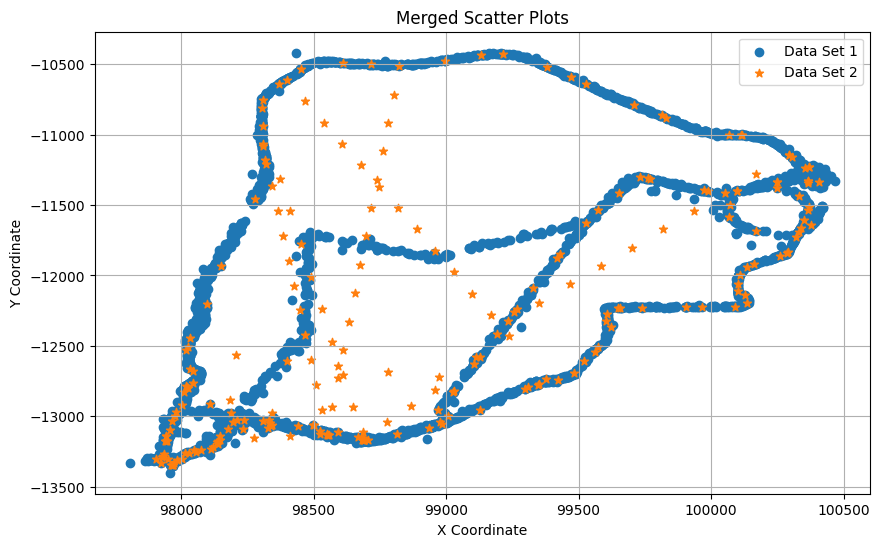

In [18]:
# use json
# reads JSON lines from the file "inners1.txt" and appends them to the inline list
import json

inner = "inners1.txt"
# reads JSON lines from the file "outliers.txt" and appends them to the outline list
out = "outliers.txt"

inline = []
outline = []
f = open(inner)
for line in f.readlines():
  #print(line)
  #arr =  line.split(',')
  js = json.loads(line)
  inline += js
  #print(js)
  #print(len(arr))
#print(len(inline))
#print(inline[:10])


f2 = open(out)
#print(len(f2.readlines()))
for line in f2.readlines():
  js = json.loads(line)
  outline += js


import matplotlib.pyplot as plt

x1, y1 = zip(*inline)
x2, y2 = zip(*outline)


fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x1, y1, label='Data Set 1', marker='o')

ax.scatter(x2, y2, label='Data Set 2', marker='*')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Merged Scatter Plots')
ax.legend()
ax.grid(True)

plt.show()


In [19]:
inline = [(float(x), float(y)) for x, y in inline]


In [20]:
!pip install matplotlib numpy


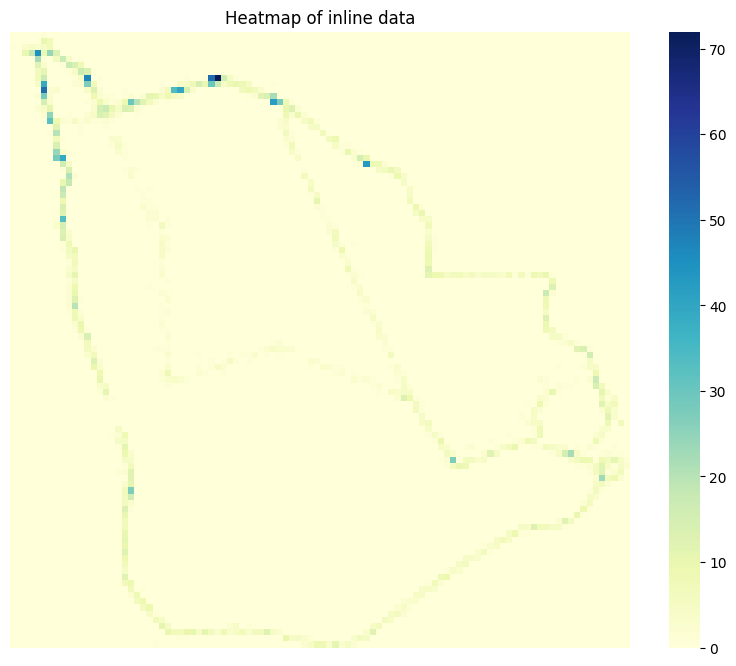

In [21]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#  plotting it as a 2D histogram (heat map) using NumPy, Seaborn, and Matplotlib.

x = [point[0] for point in inline]
y = [point[1] for point in inline]


heatmap_data, xedges, yedges = np.histogram2d(x, y, bins=(100, 100))
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar=True, xticklabels=False, yticklabels=False)
plt.title("Heatmap of inline data")
plt.show()


In [3]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#  plotting it as a 2D histogram (heat map) using NumPy, Seaborn, and Matplotlib.

x = [point[0] for point in outline]
y = [point[1] for point in outline]


heatmap_data, xedges, yedges = np.histogram2d(x, y, bins=(100, 100))
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar=True, xticklabels=False, yticklabels=False)
plt.title("Heatmap of outline data")
plt.show()

NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


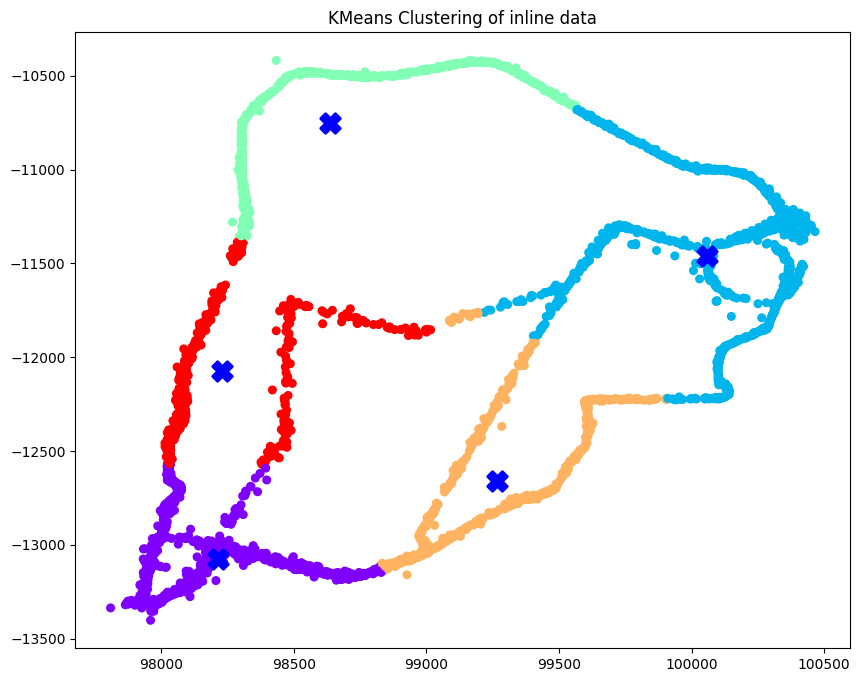

In [23]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Convert inline to a numpy array for compatibility with sklearn
data_array = np.array(inline)

# Apply KMeans clustering. Let's assume 3 clusters for this example, but you can adjust as needed.
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_array)
labels = kmeans.predict(data_array)
centroids = kmeans.cluster_centers_

# Plot the clustered points with the centroids
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='rainbow', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=2, color='blue', zorder=10)
plt.title("KMeans Clustering of inline data")
plt.show()


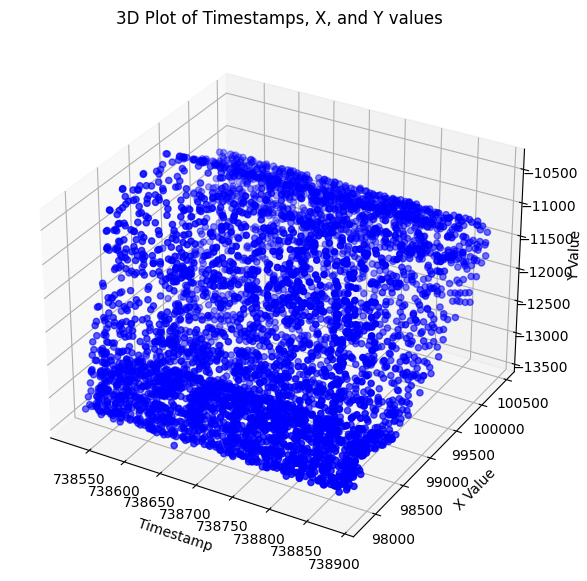

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample inline data
# inline = [[x1, y1], [x2, y2], ...]

# Assuming you've loaded the inline dataset from your previous interactions
# Generate synthetic timestamps
start_date = "2023-01-01"
end_date = "2023-12-31"
timestamps = pd.date_range(start_date, end_date, periods=len(inline)).tolist()

# Combine inline data with timestamps
merged_data = [(timestamp, coord[0], coord[1]) for timestamp, coord in zip(timestamps, inline)]

# Convert merged data to DataFrame
df = pd.DataFrame(merged_data, columns=["Timestamp", "X", "Y"])

# Convert Timestamps to numerical data for 3D plotting (using date ordinal)
df["Timestamp"] = df["Timestamp"].apply(lambda x: x.toordinal())

# 3D Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Timestamp"], df["X"], df["Y"], c='b', marker='o')

ax.set_xlabel('Timestamp')
ax.set_ylabel('X Value')
ax.set_zlabel('Y Value')
ax.set_title("3D Plot of Timestamps, X, and Y values")

# Display the plot
plt.show()


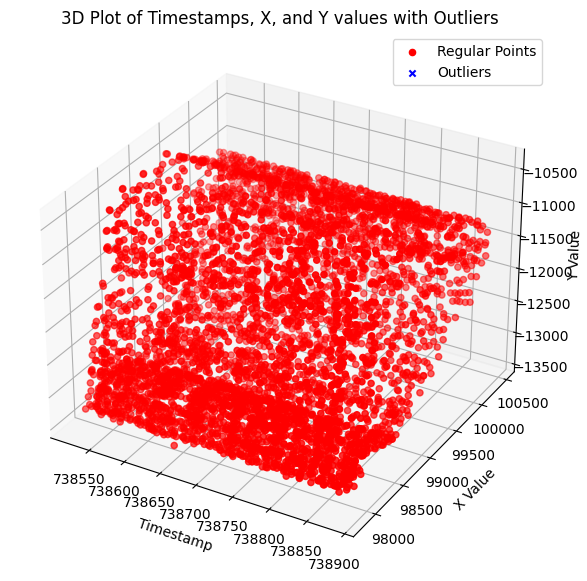

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Generate synthetic timestamps
start_date = "2023-01-01"
end_date = "2023-12-31"
timestamps = pd.date_range(start_date, end_date, periods=len(inline)).tolist()

# Combine inline data with timestamps
merged_data = [(timestamp, coord[0], coord[1]) for timestamp, coord in zip(timestamps, inline)]

# Convert merged data to DataFrame
df = pd.DataFrame(merged_data, columns=["Timestamp", "X", "Y"])

# Convert Timestamps to numerical data for 3D plotting (using date ordinal)
df["Timestamp"] = df["Timestamp"].apply(lambda x: x.toordinal())

# Detecting outliers for the 'X' and 'Y' columns
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

outliers_mask = detect_outliers(df['X']) | detect_outliers(df['Y'])

# 3D Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the regular data points
ax.scatter(df["Timestamp"][~outliers_mask], df["X"][~outliers_mask], df["Y"][~outliers_mask], c='r', marker='o', label="Regular Points")

# Plotting the outliers
ax.scatter(df["Timestamp"][outliers_mask], df["X"][outliers_mask], df["Y"][outliers_mask], c='b', marker='x', label="Outliers")

ax.set_xlabel('Timestamp')
ax.set_ylabel('X Value')
ax.set_zlabel('Y Value')
ax.set_title("3D Plot of Timestamps, X, and Y values with Outliers")
ax.legend()

# Display the plot
plt.show()


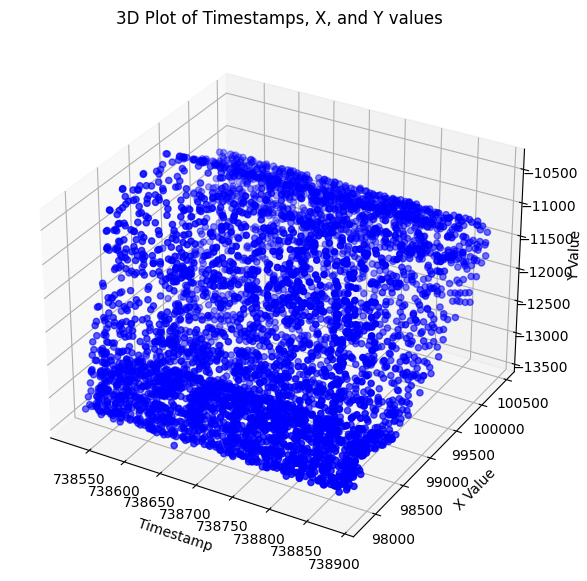

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Generate synthetic timestamps
start_date = "2023-01-01"
end_date = "2023-12-31"
timestamps = pd.date_range(start_date, end_date, periods=len(outline)).tolist()

# Combine inline data with timestamps
merged_data2 = [(timestamp, coord[0], coord[1]) for timestamp, coord in zip(timestamps, outline)]

# Convert merged data to DataFrame
df = pd.DataFrame(merged_data, columns=["Timestamp", "X", "Y"])

# Convert Timestamps to numerical data for 3D plotting (using date ordinal)
df["Timestamp"] = df["Timestamp"].apply(lambda x: x.toordinal())

# 3D Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Timestamp"], df["X"], df["Y"], c='b', marker='o')

ax.set_xlabel('Timestamp')
ax.set_ylabel('X Value')
ax.set_zlabel('Y Value')
ax.set_title("3D Plot of Timestamps, X, and Y values")

# Display the plot
plt.show()

In [27]:
# Sample inline and outline data
# inline = [[x1, y1], [x2, y2], ...]
# outline = [[x1, y1], [x2, y2], ...]

data_textual = ["X: {} Y: {}".format(x, y) for x, y in inline + outline]


In [2]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.3 MB/s eta 0:00:00
